In [97]:
import numpy as np
import keras
import warnings
from matplotlib import pyplot as plt
import cv2
warnings.filterwarnings('ignore')
from keras.applications.vgg16 import preprocess_input

In [98]:
def image_process(img,r_size,c_size):
    scaled_image = cv2.resize(img, (r_size, c_size))
    rot_image = np.rot90(scaled_image,-1)
    return rot_image

In [135]:
dire = '/users/xjing/Desktop/GitHub/T-Mobile_Hackathon/finger/'
dire = ''
filename = 'FiveOpen.MOV'

In [136]:
def extract_image_data(dire = dire, filename = filename,r_size=224,c_size=224):
    file = dire+ filename
    vidcap = cv2.VideoCapture(file)
    flag = True
    image_list = []
    cnt = 0
    while flag:
        flag,img = vidcap.read()
        if flag:
            image_list += [image_process(img,r_size,c_size)]
            cnt += 1
    return image_list

In [137]:
image_list = extract_image_data(dire,filename)
print(image_list[0].shape)
print(len(image_list))

(224, 224, 3)
295


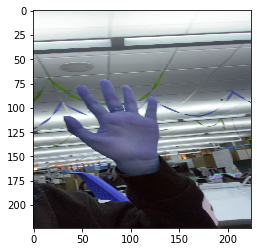

In [138]:
imgplot = plt.imshow(image_list[0])

In [139]:
image_dataset = []
category_dataset = []
cat = 0
proj = {}
for filename in ['FiveOpen.MOV','ok.MOV','fistback.MOV','fistfront.MOV','yeah.MOV','twofingers.MOV','thumbup.MOV']:
    image_list = extract_image_data(dire,filename)
    image_dataset += image_list
    category_dataset += [cat for _ in image_list]
    proj[cat] = filename.split('.')[0]
    cat += 1
image_dataset = np.asarray(image_dataset)
category_dataset = np.asarray(category_dataset)
category_dataset = keras.utils.to_categorical(category_dataset)

In [140]:
print(image_dataset.shape)

(2336, 224, 224, 3)


In [141]:
print(category_dataset.shape)

(2336, 7)


In [92]:
from sklearn.model_selection import train_test_split

dat_train, dat_test, y_train, y_test = train_test_split(image_dataset, category_dataset, test_size=0.2, random_state=42, stratify=category_dataset)

ModuleNotFoundError: No module named 'sklearn.model_selection'

In [142]:
from keras import models, layers, optimizers
from keras.applications import VGG16
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

from keras import models

In [143]:
r_size=224
c_size=224
model = keras.applications.MobileNet(include_top=False, 
                                                  weights='imagenet', 
                                                  input_shape=(r_size, c_size, 3), 
                                                  pooling=None)

In [144]:
#print(model.summary())

In [145]:
%%time
processed_input = model.predict(image_dataset)

CPU times: user 8min 4s, sys: 2min 12s, total: 10min 16s
Wall time: 39.4 s


In [146]:
print(image_dataset[0].shape)
print(processed_input.shape)

(224, 224, 3)
(2336, 7, 7, 1024)


In [148]:
top_model = models.Sequential()
top_model.add(layers.Flatten(input_shape=(7, 7, 1024)))
top_model.add(layers.Dense(128, activation='relu'))
top_model.add(layers.Dense(128, activation='relu'))
top_model.add(layers.Dense(128, activation='relu'))
top_model.add(layers.Dropout(0.5))
top_model.add(layers.Dense(64, activation='relu'))
top_model.add(layers.Dense(7, activation='softmax'))

top_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
top_model.fit(processed_input, category_dataset, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
2336/2336 [==============================] - 7s 3ms/step - loss: 2.6428 - acc: 0.7051
Epoch 2/10
2336/2336 [==============================] - 1s 474us/step - loss: 0.2316 - acc: 0.9572
Epoch 3/10
2336/2336 [==============================] - 1s 472us/step - loss: 0.1610 - acc: 0.9726
Epoch 4/10
2336/2336 [==============================] - 1s 471us/step - loss: 0.2000 - acc: 0.9735
Epoch 5/10
2336/2336 [==============================] - 1s 482us/step - loss: 0.0210 - acc: 0.9961
Epoch 6/10
2336/2336 [==============================] - 1s 483us/step - loss: 0.0632 - acc: 0.9897
Epoch 7/10
2336/2336 [==============================] - 1s 493us/step - loss: 0.0672 - acc: 0.9932
Epoch 8/10
2336/2336 [==============================] - 1s 487us/step - loss: 0.0180 - acc: 0.9974
Epoch 9/10
2336/2336 [==============================] - 1s 493us/step - loss: 0.0344 - acc: 0.9953
Epoch 10/10
2336/2336 [==============================] - 1s 481us/step - loss: 0.0072 - acc: 0.9974


In [149]:
pred = [proj[i] for i in top_model.predict_classes(processed_input)]

In [150]:
print(pred)

['FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'FiveOpen', 'Fi